# Assignment no: 7 - K-MEAN Clustering
# Data set: Crime_data

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler   # this is to scale the data 

In [3]:
crime=pd.read_csv('C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 7/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime1=crime.drop(crime.iloc[:,0:1],axis=1)
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [6]:
scaler=StandardScaler()
crime_scale=scaler.fit_transform(crime1)
crime_scale

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [7]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


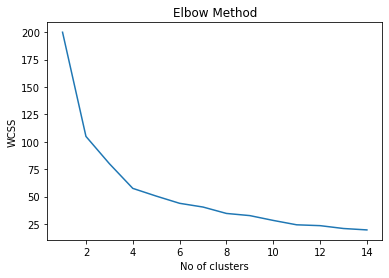

In [8]:
wcss=[]
for i in range(1,15):
    Kmeans=KMeans(n_clusters=i,random_state=0)
    Kmeans.fit(crime_scale)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [9]:
#Build new Cluster algorithm
new_cluster=KMeans(5,random_state=10)
new_cluster.fit(crime_scale)

KMeans(n_clusters=5, random_state=10)

In [10]:
new_cluster.labels_

array([0, 2, 2, 1, 2, 2, 4, 1, 2, 0, 4, 3, 2, 1, 3, 1, 1, 0, 3, 2, 4, 2,
       3, 0, 1, 3, 1, 2, 3, 4, 2, 2, 0, 3, 1, 1, 1, 1, 4, 0, 3, 0, 2, 4,
       3, 1, 1, 3, 3, 1])

In [11]:
#assign this cluster to data set
crime['clusterid_new'] =new_cluster.labels_

In [12]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [13]:
#these are standardized values.
new_cluster.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.22748551, -0.30098674, -0.01276108, -0.10667779],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.11467476, -1.17725513, -1.00201665, -1.05938813],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482]])

In [14]:
crime.groupby('clusterid_new').agg('mean').reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
0,0,14.671429,251.285714,54.285714,21.685714
1,1,6.807143,145.928571,65.357143,20.242857
2,2,10.966667,264.000000,76.500000,33.608333
3,3,2.981818,73.636364,51.181818,11.409091
4,4,4.500000,126.333333,83.500000,16.266667


In [15]:
crime.sort_values('clusterid_new').head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
9,Georgia,17.4,211,60,25.8,0
32,North Carolina,13.0,337,45,16.1,0
23,Mississippi,16.1,259,44,17.1,0
17,Louisiana,15.4,249,66,22.2,0
46,Washington,4.0,145,73,26.2,1
45,Virginia,8.5,156,63,20.7,1
37,Pennsylvania,6.3,106,72,14.9,1


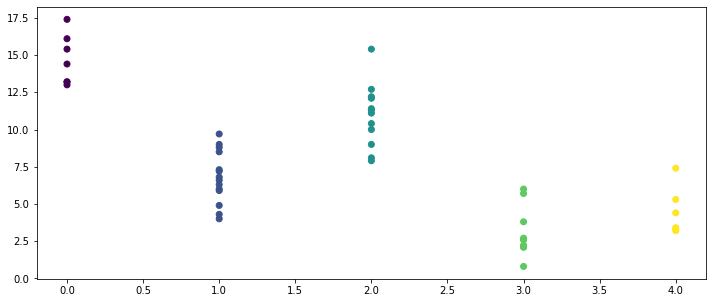

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(crime['clusterid_new'],crime['Murder'],c=new_cluster.labels_)